# NLP Audio Language Detection V6

## Importing dependencies

In [24]:
!pip install --upgrade librosa

  Using cached librosa-0.10.1-py3-none-any.whl (253 kB)
  Using cached pooch-1.8.0-py3-none-any.whl (62 kB)
  Using cached soundfile-0.12.1-py2.py3-none-win_amd64.whl (1.0 MB)
  Using cached soxr-0.3.7-cp39-cp39-win_amd64.whl (184 kB)
  Using cached lazy_loader-0.3-py3-none-any.whl (9.1 kB)
  Using cached typing_extensions-4.9.0-py3-none-any.whl (32 kB)
  Using cached audioread-3.0.1-py3-none-any.whl (23 kB)
  Using cached platformdirs-4.1.0-py3-none-any.whl (17 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.2
    Uninstalling numpy-1.26.2:
      Successfully uninstalled numpy-1.26.2
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.10.0.2
    Uninstalling typing-extensions-3.10.0.2:
      Successfully uninstalled typing-extensions-3.10.0.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.3.0 requires daal==2021.2.3, which is not installed.
tensorflow-intel 2.15.0 requires numpy<2.0.0,>=1.23.5, but you have numpy 1.20.3 which is incompatible.


In [1]:
import numpy as np # linear algebra
import pandas as pd # dataset handling
import librosa # audio data
import librosa.display # audio data plots
import IPython.display as ipd # playing audio
import matplotlib.pyplot as plt # plotting
import os # interacting with operating system
import tensorflow as tf # tensorflow
from tqdm import tqdm # progress bar
import seaborn as sns

from sklearn.preprocessing import LabelEncoder # add placeholder values for categorical variables
from sklearn.metrics import classification_report, confusion_matrix # accuracy metrics for classification model
from sklearn.model_selection import GridSearchCV # grid search hyperparameters

from tensorflow.keras import Sequential # squential neural network
from tensorflow.keras.layers import Dense # feed forward layer
from tensorflow.keras.layers import Conv2D # convolutional layer
from tensorflow.keras.layers import MaxPool2D # pooling layer
from tensorflow.keras.layers import Flatten # flatten 2d/3d array into 1d array
from tensorflow.keras.layers import Dropout # reduce overfitting
from tensorflow.keras.callbacks import EarlyStopping # early stopping to reduce overfitting
from tensorflow.keras.optimizers import Adam # Adam optimizer
from tensorflow.keras.utils import plot_model # plot model architecture
from tensorflow.keras.layers import BatchNormalization # standardize the input for each mini batch 
from scikeras.wrappers import KerasClassifier, KerasRegressor # link tensorflow model with sklearn
from tensorflow.keras.models import load_model # loading the model

In [2]:
# configuring gpu for tensorflow
# skip this if you have not setup gpu for tensorflow

os.environ['CUDA_VISIBLE_DEVICES'] = '0' # 0 for GPU
                                         # -1 for CPU
if tf.test.gpu_device_name():
    print('GPU found')
else:
    print("No GPU found")

No GPU found


## Exploring the voice data

### German voice

In [ ]:
# settting train path and file name 
# and extracting the audio (German) in array form along with its samplerate
# by default, librosa converts the audio into 22 kHz sample rate, scales the data and converts the audio into mono channel

train_path = r'C:\Users\ABC\Downloads\\'
filename_de = 'de_f_5d2e7f30d69f2d1d86fd05f3bbe120c2.fragment1.flac'
x_de, sr_de = librosa.load(train_path+filename_de)

print(x_de.shape)
print(x_de)
print(sr_de)

: 

In [ ]:
# playing the audio

ipd.Audio(data=x_de, rate=sr_de)

: 

AttributeError: module 'librosa.display' has no attribute 'waveplot'

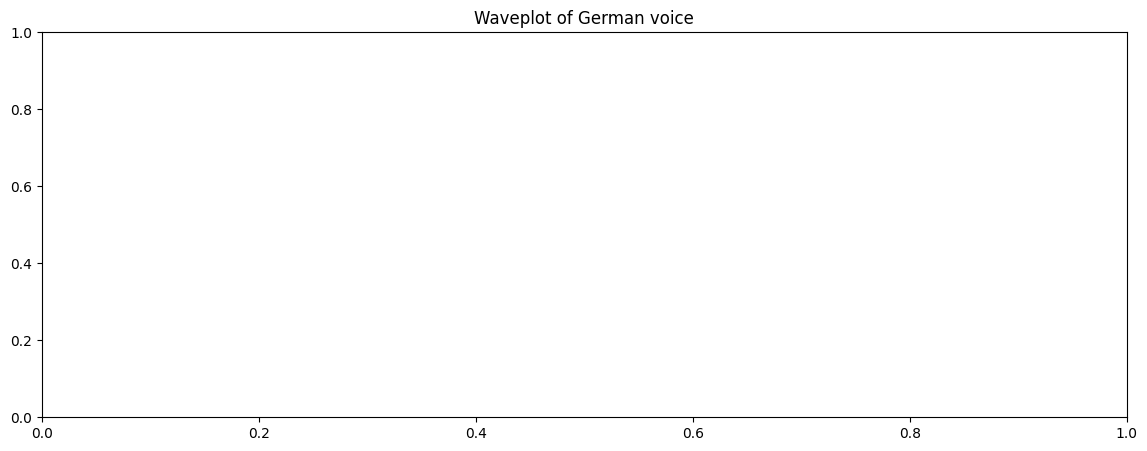

In [5]:
# waveplot of the audio

plt.figure(figsize=(14,5))
plt.title('Waveplot of German voice')
librosa.display.waveplot(x_de, sr = sr_en)
plt.show()

In [6]:
# extracting Mel Frequency Cepstral Coefficients (MFCCs) from the audio

mfccs_de = librosa.feature.mfcc(y=x_de, sr=sr_de, n_mfcc=40)
print(mfccs_de.shape)
print(mfccs_de)

(40, 431)
[[-3.6846582e+02 -3.3823975e+02 -3.7329178e+02 ... -3.1337805e+02
  -3.1398969e+02 -3.2152948e+02]
 [-7.9468674e+01 -7.2295914e+01 -6.0284107e+01 ... -8.3601120e+01
  -8.3852020e+01 -7.0819702e+01]
 [ 9.6604519e+00 -5.0667864e-01 -2.8089414e+00 ...  1.5601126e+01
   1.5805096e+01  1.6995865e+01]
 ...
 [-4.9892530e+00 -3.3516445e+00 -4.1086283e+00 ...  8.5036793e+00
   5.2606983e+00  3.0091796e+00]
 [-4.3882637e+00 -1.3772264e+00 -1.5257025e-01 ... -3.2378883e+00
  -5.0671515e+00 -1.7339613e+00]
 [-7.5136356e+00 -2.5011613e+00 -1.4187926e-01 ... -1.4047135e+00
  -9.3014342e-01 -1.0906394e+00]]


In [9]:
print(librosa.__version__)

0.10.1


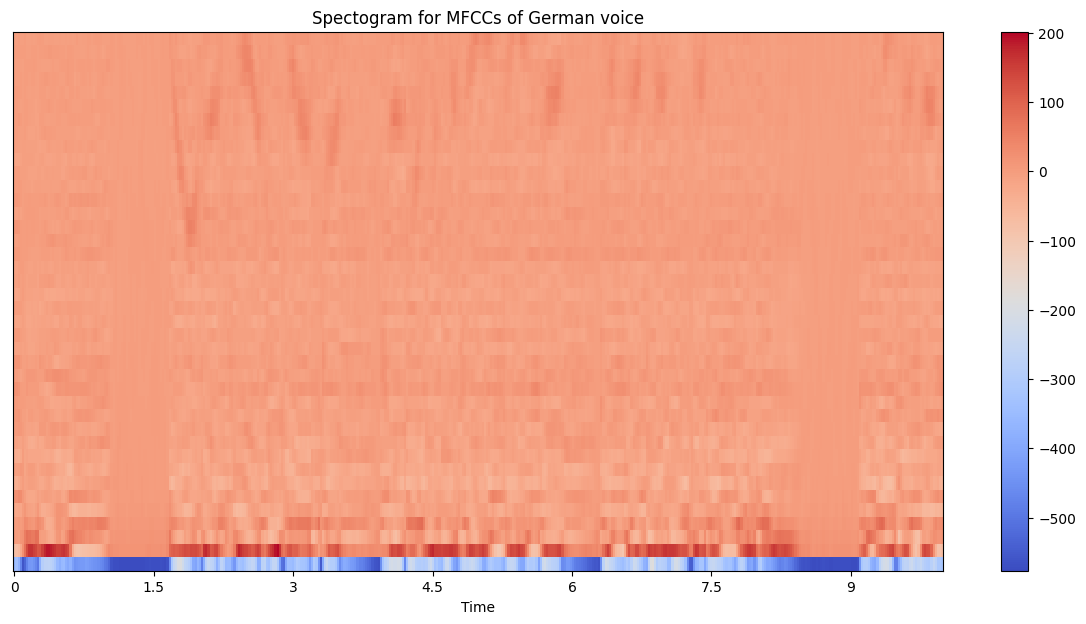

In [7]:
# plotting the MFCCs spectogram

plt.figure(figsize=(15,7))
plt.title('Spectogram for MFCCs of German voice')
librosa.display.specshow(mfccs_de, sr=sr_de, x_axis='time')
plt.colorbar()
plt.show()

### English voice

In [8]:
# settting train path and file name 
# and extracting the audio (English) in array form along with its samplerate
# by default, librosa converts the audio into 22 kHz sample rate, scales the data and converts the audio into mono channel

train_path = r'C:\Users\ABC\Downloads\\'
filename_en = 'en_m_65733942d40b2431cf22fe21495693f7.fragment5.noise8.flac'
x_en, sr_en = librosa.load(train_path+filename_en)

print(x_en.shape)
print(x_en)
print(sr_en)

(220500,)
[ 0.01806641  0.03265381  0.03326416 ... -0.02374268 -0.02389526
 -0.02331543]
22050


In [9]:
# playing the audio

ipd.Audio(data=x_en, rate=sr_en)

AttributeError: module 'librosa.display' has no attribute 'waveplot'

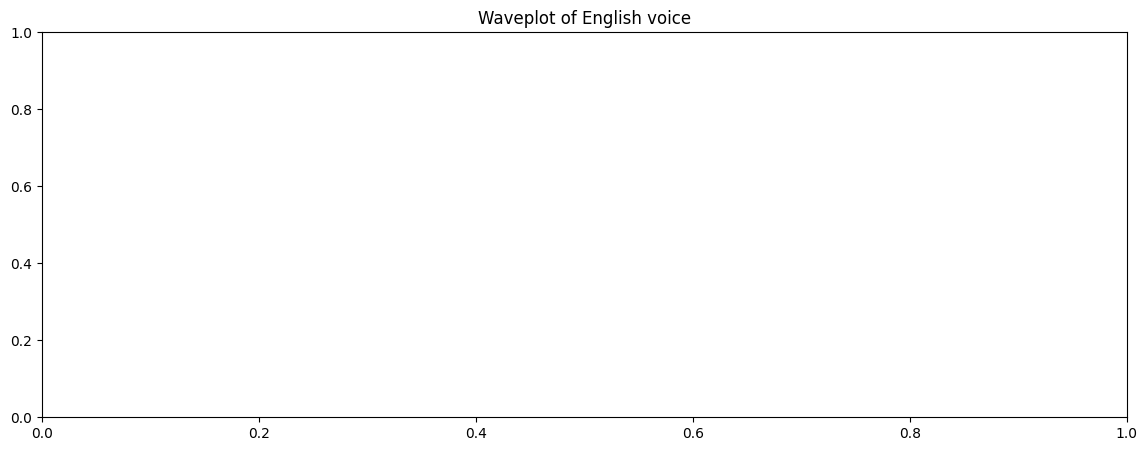

In [10]:
# waveplot of the audio

plt.figure(figsize=(14,5))
plt.title('Waveplot of English voice')
librosa.display.waveplot(x_en, sr_en)
plt.show()

In [11]:
# extracting Mel Frequency Cepstral Coefficients (MFCCs) from the audio

mfccs_en = librosa.feature.mfcc(y=x_en, sr=sr_en, n_mfcc=40)
print(mfccs_en.shape)
print(mfccs_en)

(40, 431)
[[-269.8683     -249.63223    -256.28256    ... -241.09186
  -288.03018    -285.90228   ]
 [  94.03434     104.9376      112.61098    ...   91.479355
   133.13391     142.93204   ]
 [ -19.761618    -22.296919    -28.723568   ...  -26.01315
   -48.38785     -39.850952  ]
 ...
 [   4.656252      5.4319935     0.76691836 ...    1.4248208
    -0.50751615   -0.32203555]
 [   3.196107      2.8338118    -3.799836   ...   -3.424963
    -2.8192897    -2.2384133 ]
 [  17.863934     12.281424      1.7877373  ...    4.845054
     1.5198579    -2.6047146 ]]


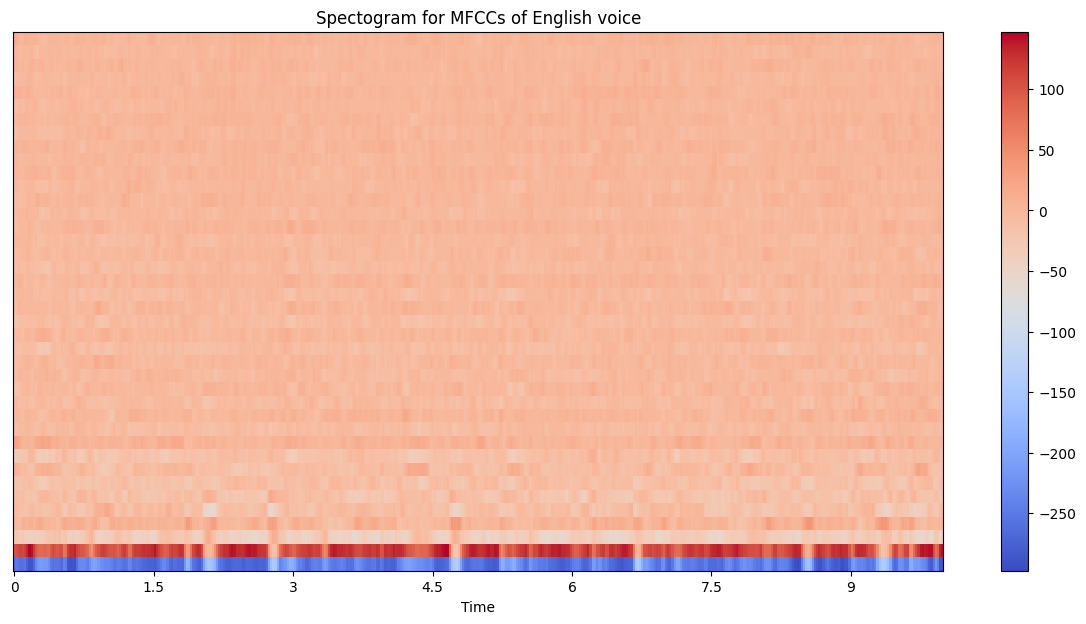

In [12]:
# plotting the MFCCs spectogram

plt.figure(figsize=(15,7))
plt.title('Spectogram for MFCCs of English voice')
librosa.display.specshow(mfccs_en, sr=sr_en, x_axis='time')
plt.colorbar()
plt.show()

### Spanish voice

In [80]:
# settting train path and file name 
# and extracting the audio (Spanish) in array form along with its samplerate
# by default, librosa converts the audio into 22 kHz sample rate, scales the data and converts the audio into mono channel

train_path = r'C:\Users\ABC\Downloads\audios\\'
filename_es = 'es_m_f16e9da2ba7126292cb4e46ce16995bc.fragment25.pitch7.flac'
x_es, sr_es = librosa.load(train_path+filename_es)

print(x_es.shape)
print(x_es)
print(sr_es)

(220500,)
[1.8280029e-02 2.3925781e-02 2.0141602e-02 ... 9.1552734e-05 0.0000000e+00
 3.0517578e-05]
22050


In [81]:
# playing the audio

ipd.Audio(data=x_es, rate=sr_es)

AttributeError: module 'librosa.display' has no attribute 'waveplot'

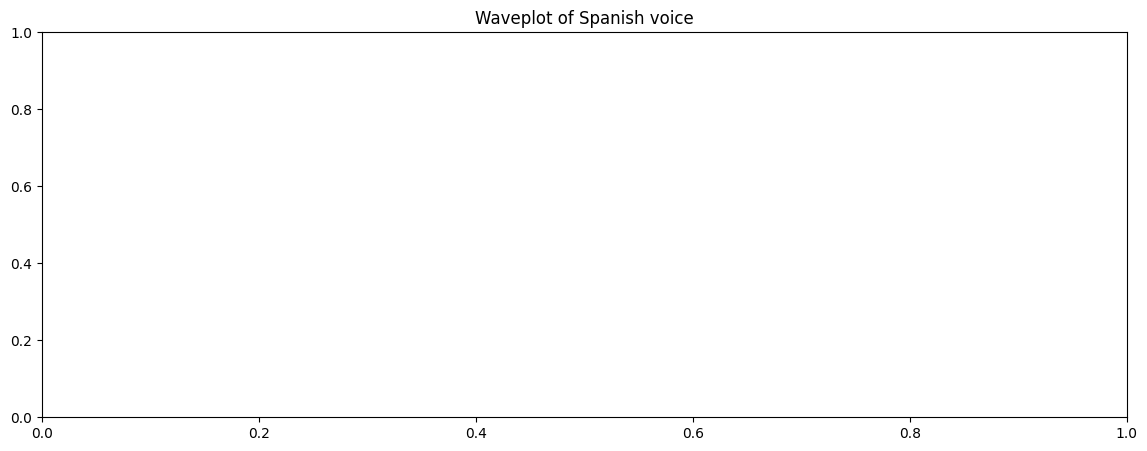

In [18]:
# waveplot of the audio

plt.figure(figsize=(14,5))
plt.title('Waveplot of Spanish voice')
librosa.display.waveplot(x_es, sr_es)
plt.show()

In [15]:
# extracting Mel Frequency Cepstral Coefficients (MFCCs) from the audio

mfccs_es = librosa.feature.mfcc(y=x_es, sr=sr_es, n_mfcc=40)
print(mfccs_es.shape)
print(mfccs_es)

(40, 431)
[[-4.02293823e+02 -4.47123108e+02 -5.56470520e+02 ... -6.51073547e+02
  -6.54251953e+02 -6.56518860e+02]
 [ 1.24670395e+02  1.39241974e+02  1.10648727e+02 ...  2.52716045e+01
   2.10061264e+01  1.78673401e+01]
 [ 7.38146734e+00  9.45260429e+00  3.49495735e+01 ...  2.38098183e+01
   2.01803551e+01  1.72298965e+01]
 ...
 [-3.30438375e+00 -4.40484428e+00 -7.83735991e-01 ... -8.03455412e-01
  -8.64751160e-01 -1.24088788e+00]
 [-1.80727589e+00 -3.50588560e+00 -6.09921980e+00 ... -5.85098088e-01
  -9.94100273e-01 -1.65862536e+00]
 [ 4.01391220e+00  1.95783067e+00 -3.55588579e+00 ... -4.82498705e-01
  -1.16902399e+00 -2.02259636e+00]]


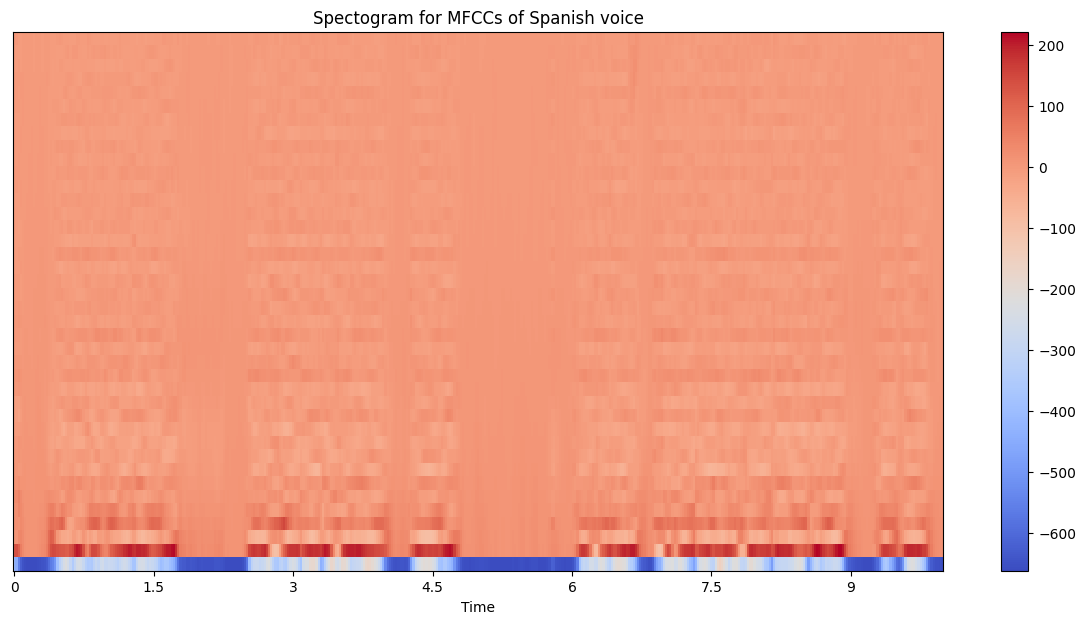

In [16]:
# plotting the MFCCs spectogram

plt.figure(figsize=(15,7))
plt.title('Spectogram for MFCCs of Spanish voice')
librosa.display.specshow(mfccs_es, sr=sr_es, x_axis='time')
plt.colorbar()
plt.show()

## Loading the audio data and creating meta dataset

In [70]:
# creating a language code-language dictonary with the 3 langauges the dataset contians

lang_code = {'de':'German', 'es':'Spanish', 'en':'English'}

In [138]:
# iterating through the folder containing training audio creating lists containing 
# the audio filename, the language code of the audio and the language of the audio 
train_path1 = r'C:\Users\ABC\Downloads\audios\\'
filename_list = []
language_code_list = []
language_list = []
for filename in os.listdir(train_path1):
    lang = filename[:2]
    file = filename
    filename_list.append(file)
    language_code_list.append(lang)
    language_list.append(lang_code[lang])

In [139]:
# checking if all files have been iterated through

print(len(filename_list), len(language_list), len(language_code_list))

142 142 142


In [140]:
# creating a metadataset containing filename, language code and language for training data

meta_data = pd.DataFrame({'filename':filename_list, 'lang_code':language_code_list, 'language':language_list})
meta_data = meta_data.sample(frac=1).reset_index(drop=True)

In [141]:
# meta dataset

print(meta_data.shape)
meta_data.head()

(142, 3)


,filename,lang_code,language
0,en_m_011f3a2d0aa2880305c08b76873c3e10.fragment...,en,English
1,en_m_6a5535d7512259e7bef76ff997750873.fragment...,en,English
2,en_m_6a5535d7512259e7bef76ff997750873.fragment...,en,English
3,en_f_5dff2b7b319207972450f91d569b5a16.fragment...,en,English
4,es_f_eca5ab833fd0b8e6d9b77a7df5d8610d.fragment...,es,Spanish


In [142]:
def feature_extractor(filename,path):
    """
    function that takes audio filename and its path as input and returns an array containing mfccs 
    """
    audio, sample_rate = librosa.load(path+filename)
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_features = mfccs_features.T
    return mfccs_features

In [143]:
b = feature_extractor('es_m_f16e9da2ba7126292cb4e46ce16995bc.fragment25.pitch7.flac', train_path)

In [144]:
b

array([[-4.02293823e+02,  1.24670395e+02,  7.38146734e+00, ...,
        -3.30438375e+00, -1.80727589e+00,  4.01391220e+00],
       [-4.47123108e+02,  1.39241974e+02,  9.45260429e+00, ...,
        -4.40484428e+00, -3.50588560e+00,  1.95783067e+00],
       [-5.56470520e+02,  1.10648727e+02,  3.49495735e+01, ...,
        -7.83735991e-01, -6.09921980e+00, -3.55588579e+00],
       ...,
       [-6.51073547e+02,  2.52716045e+01,  2.38098183e+01, ...,
        -8.03455412e-01, -5.85098088e-01, -4.82498705e-01],
       [-6.54251953e+02,  2.10061264e+01,  2.01803551e+01, ...,
        -8.64751160e-01, -9.94100273e-01, -1.16902399e+00],
       [-6.56518860e+02,  1.78673401e+01,  1.72298965e+01, ...,
        -1.24088788e+00, -1.65862536e+00, -2.02259636e+00]], dtype=float32)

In [145]:
b.shape

(431, 40)

In [146]:
# iterating through all the files in training folder and extracting lists that contain mfccs features, language of audio
# and name of the audio file

feature_list = []
language_list = []
filename_list = []
for index, row in tqdm(meta_data.iterrows()):
    file = row['filename']
    feature = feature_extractor(file,train_path)
    lang = row['language']
    feature_list.append(feature)
    language_list.append(lang)
    filename_list.append(file)

142it [00:02, 52.53it/s]


In [147]:
# creating a dataset with filename, mfccs features and language

feature_data = pd.DataFrame({'filename':filename_list, 'mfccs_feature':feature_list, 'language':language_list})
print(feature_data.shape)
feature_data.head()

(142, 3)


,filename,mfccs_feature,language
0,en_m_011f3a2d0aa2880305c08b76873c3e10.fragment...,"[[-283.3518, 140.21979, -22.733047, 27.789852,...",English
1,en_m_6a5535d7512259e7bef76ff997750873.fragment...,"[[-312.95282, 133.74367, 16.96988, 36.09456, -...",English
2,en_m_6a5535d7512259e7bef76ff997750873.fragment...,"[[-369.9552, 144.48773, 8.022728, 35.007545, 5...",English
3,en_f_5dff2b7b319207972450f91d569b5a16.fragment...,"[[-217.38411, 121.04547, 0.6791064, 29.220772,...",English
4,es_f_eca5ab833fd0b8e6d9b77a7df5d8610d.fragment...,"[[-440.40457, 101.87869, 46.268723, 12.635038,...",Spanish


In [148]:
# saving feature data matrix in order to ensure we don't have to extract the features each time we run the code file

feature_data.to_csv('feature_data.csv', index=False)

In [149]:
# loading the dataset with features

feature_data = pd.read_csv('feature_data.csv', delimiter=',')
print(feature_data.shape)
feature_data.head()

(142, 3)


,filename,mfccs_feature,language
0,en_m_011f3a2d0aa2880305c08b76873c3e10.fragment...,[[-283.3518 140.21979 -22.733047 .....,English
1,en_m_6a5535d7512259e7bef76ff997750873.fragment...,[[-3.1295282e+02 1.3374367e+02 1.6969879e+01...,English
2,en_m_6a5535d7512259e7bef76ff997750873.fragment...,[[-3.6995520e+02 1.4448773e+02 8.0227280e+00...,English
3,en_f_5dff2b7b319207972450f91d569b5a16.fragment...,[[-217.38411 121.04547 0.6791064 .....,English
4,es_f_eca5ab833fd0b8e6d9b77a7df5d8610d.fragment...,[[-4.4040457e+02 1.0187869e+02 4.6268723e+01...,Spanish


## Splitting the data into inputs and targets

In [150]:
# creating input (dependent) variable containing mfccs features

X = np.array(feature_list)

print(X.shape)
# (73080, 431, 40)

(142, 431, 40)


In [151]:
# saving input variable data

np.save('X_data', X)

In [152]:
# loading input variable data

X_1 = np.load('X_data.npy')

In [153]:
X_1.shape

(142, 431, 40)

In [154]:
X = X_1

In [155]:
# reshaping the input data into 3D array compatiable with CNNs

X = X.reshape((X.shape[0], X.shape[1], X.shape[2], 1))
print(X.shape)

(142, 431, 40, 1)


In [156]:
# creating target (dependent) variable with placeholder values for various categories

le = LabelEncoder()
y = le.fit_transform(feature_data['language'])
y = np.array(y.tolist())

In [157]:
# shape of X and y

print(X.shape, y.shape)

(142, 431, 40, 1) (142,)


## Creating a baseline Convolutional Neural Network (CNN) model

In [158]:
# input and output shape hyperparameters

INPUT_SHAPE = X.shape[1:]
OUTPUT_SHAPE = 3
print(INPUT_SHAPE, OUTPUT_SHAPE)

(431, 40, 1) 3


In [159]:
# creating a sequential CNN model with 2 Convolutional and Pooling layers which are later flattened and fed to dense layer
# each layer has ReLU has activation function and he_normal as kernel intializer
# ouput layer has softmax activation as we have multiclassification problem

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', input_shape=INPUT_SHAPE))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(OUTPUT_SHAPE, activation='softmax'))

In [160]:
# model = Sequential()
# model.add(Conv2D(32,(7, 7), activation='relu', padding='valid', input_shape=INPUT_SIZE))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='same'))
# model.add(Conv2D(64,(5,5), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='same'))
# model.add(Conv2D(128,(3,3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='same'))
# model.add(Conv2D(256,(3,3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='same'))
# model.add(Conv2D(512,(3,3), activation='relu', padding='same'))
# model.add(BatchNormalization())
# model.add(MaxPooling2D(pool_size=(3,3), strides=2, padding='same'))
# model.add(Flatten())
# model.add(BatchNormalization())
# model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(OUTPUT_SIZE, activation='softmax'))

In [161]:
# compiling the model with adam as optimizer and sparse_categorical_crossentropy as loss

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [162]:
# fitting the model with 6 epochs, a batch size of 32 and 30% of training data as validation data

hist = model.fit(X, y, epochs=6, batch_size=32, validation_split=0.3 ,verbose=2)

Epoch 1/6
4/4 - 2s - loss: 39.4085 - accuracy: 0.3939 - val_loss: 151.1872 - val_accuracy: 0.7209 - 2s/epoch - 553ms/step
Epoch 2/6
4/4 - 1s - loss: 20.5862 - accuracy: 0.6566 - val_loss: 30.7002 - val_accuracy: 0.7674 - 688ms/epoch - 172ms/step
Epoch 3/6
4/4 - 1s - loss: 3.0375 - accuracy: 0.8081 - val_loss: 7.3518 - val_accuracy: 0.7442 - 711ms/epoch - 178ms/step
Epoch 4/6
4/4 - 1s - loss: 1.3764 - accuracy: 0.8586 - val_loss: 3.7653 - val_accuracy: 0.8837 - 670ms/epoch - 168ms/step
Epoch 5/6
4/4 - 1s - loss: 0.5060 - accuracy: 0.8889 - val_loss: 3.0871 - val_accuracy: 0.8837 - 644ms/epoch - 161ms/step
Epoch 6/6
4/4 - 1s - loss: 0.4415 - accuracy: 0.8889 - val_loss: 2.1924 - val_accuracy: 0.8605 - 643ms/epoch - 161ms/step


In [163]:
# summary of the model

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 429, 38, 32)       320       
                                                                 
 batch_normalization_4 (Bat  (None, 429, 38, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 214, 19, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 212, 17, 64)       18496     
                                                                 
 batch_normalization_5 (Bat  (None, 212, 17, 64)       256       
 chNormalization)                                                
                                                      

In [164]:
# architecture plot of the model

plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


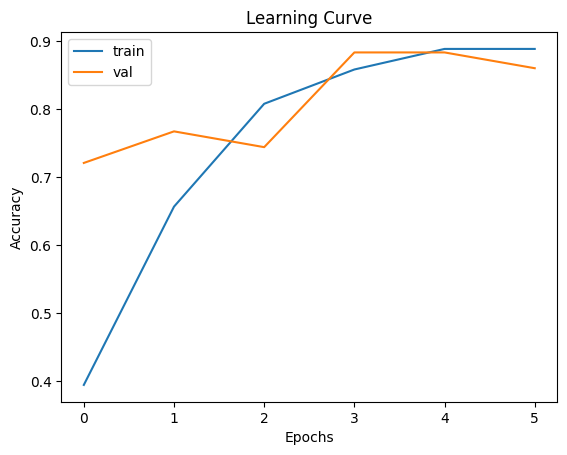

In [165]:
# learning curve plot of training accuracy vs validation accuracy

plt.title('Learning Curve')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

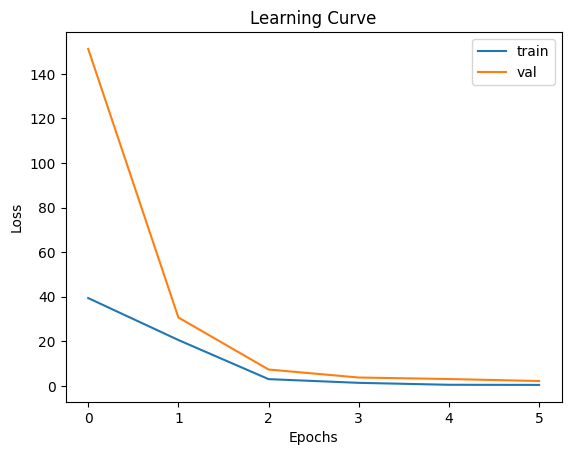

In [166]:
# learning curve plot of training accuracy vs validation accuracy

plt.title('Learning Curve')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Optimizing the model

In [167]:
# reloading the data but only loading 5000 rows of data due to hardware limitations

X_1 = np.load('X_data.npy')
X = X_1[:5000,:,:]
X = X.reshape((X.shape[0], X.shape[1], X.shape[2], 1))

le = LabelEncoder()
y = le.fit_transform(feature_data['language'])
y = np.array(y.tolist())
# y = to_categorical(y)
y = y[:5000,]

In [168]:
y

array([0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 1, 0,
       2, 1, 1, 2, 2, 0, 2, 0, 1, 0, 2, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 1, 1, 0, 2, 1, 2, 2, 0,
       2, 0, 2, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0, 0, 0, 1, 0, 0, 0, 2,
       0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 2])

In [169]:
# X and y shape

print(X.shape, y.shape)

(142, 431, 40, 1) (142,)


In [170]:
# input and output shape hyperparameters

INPUT_SHAPE = X.shape[1:]
OUTPUT_SHAPE = 3
print(INPUT_SHAPE, OUTPUT_SHAPE)

(431, 40, 1) 3


In [171]:
def create_model(learning_rate=0.001):
    """creates, compiles and returns CNN model"""
    model = Sequential()
    model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', input_shape=INPUT_SHAPE))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2,2)))
    model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal'))
    model.add(BatchNormalization())
    model.add(MaxPool2D((2,2)))
    model.add(Flatten())
    model.add(Dropout(0.1))
    model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
    model.add(Dense(OUTPUT_SHAPE, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [177]:
# configuring the model for grid search with sklearn

model = KerasClassifier(build_fn=create_model, epochs=4, batch_size=32, verbose=2,learning_rate=0.0005)

In [178]:
# setting learning rate hyperparameter values we want to iterate through and GridSearching 

learning_rate = [0.0005, 0.001, 0.01]

param_grid = dict(learning_rate=learning_rate)
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid_search.fit(X, y)

C:\Users\ABC\tensorflow file\tfvenv\lib\site-packages\scikeras\wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/4
5/5 - 4s - loss: 32.5096 - accuracy: 0.4577 - 4s/epoch - 807ms/step
Epoch 2/4
5/5 - 1s - loss: 4.7754 - accuracy: 0.8169 - 1s/epoch - 212ms/step
Epoch 3/4
5/5 - 1s - loss: 1.0607 - accuracy: 0.8239 - 1s/epoch - 216ms/step
Epoch 4/4
5/5 - 1s - loss: 0.2472 - accuracy: 0.9507 - 1s/epoch - 208ms/step


In [179]:
# best learning rate for our model

print(f"Best : {grid_result.best_score_} using {grid_result.best_params_}")

Best : 0.9296690307328604 using {'learning_rate': 0.001}


In [180]:
# result of our gridsearch

means =grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) %r" % (mean, stdev, param))

0.794770 (0.113588) {'learning_rate': 0.0005}
0.929669 (0.019655) {'learning_rate': 0.001}
0.823582 (0.056641) {'learning_rate': 0.01}


## Creating the optimized model

In [181]:
# reloading the entire dataset

X_1 = np.load('X_data.npy')
X = X_1
X = X.reshape((X.shape[0], X.shape[1], X.shape[2], 1))

le = LabelEncoder()
y = le.fit_transform(feature_data['language'])
y = np.array(y.tolist())

print(X.shape, y.shape)

(142, 431, 40, 1) (142,)


In [182]:
# setting input size and output size hyperparamters

INPUT_SHAPE = X.shape[1:]
OUTPUT_SHAPE = 3
print(INPUT_SHAPE, OUTPUT_SHAPE)

(431, 40, 1) 3


In [183]:
# creating a sequential CNN model with 2 Convolutional and Pooling layers which are later flattened and fed to dense layer
# each layer has ReLU has activation function and he_normal as kernel intializer
# ouput layer has softmax activation as we have multiclassification problem

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', kernel_initializer='he_normal', input_shape=INPUT_SHAPE))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Conv2D(64, (3,3), activation='relu', kernel_initializer='he_normal'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dropout(0.1))
model.add(Dense(100, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(OUTPUT_SHAPE, activation='softmax'))

In [184]:
# compiling the model with optimized learning rate hyperparameter value

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [185]:
# fitting the model

hist = model.fit(X, y, epochs=4, batch_size=32, validation_split=0.3 ,verbose=2)

Epoch 1/4
4/4 - 2s - loss: 27.6402 - accuracy: 0.4242 - val_loss: 88.1632 - val_accuracy: 0.7209 - 2s/epoch - 448ms/step
Epoch 2/4
4/4 - 1s - loss: 13.9776 - accuracy: 0.6566 - val_loss: 12.9736 - val_accuracy: 0.8140 - 659ms/epoch - 165ms/step
Epoch 3/4
4/4 - 1s - loss: 1.6075 - accuracy: 0.9091 - val_loss: 3.5212 - val_accuracy: 0.8372 - 648ms/epoch - 162ms/step
Epoch 4/4
4/4 - 1s - loss: 0.9025 - accuracy: 0.9596 - val_loss: 11.9574 - val_accuracy: 0.8837 - 662ms/epoch - 166ms/step


In [186]:
# summary of the model

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 429, 38, 32)       320       
                                                                 
 batch_normalization_8 (Bat  (None, 429, 38, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 214, 19, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 212, 17, 64)       18496     
                                                                 
 batch_normalization_9 (Bat  (None, 212, 17, 64)       256       
 chNormalization)                                                
                                                      

In [187]:
# architecture plot of the model

plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


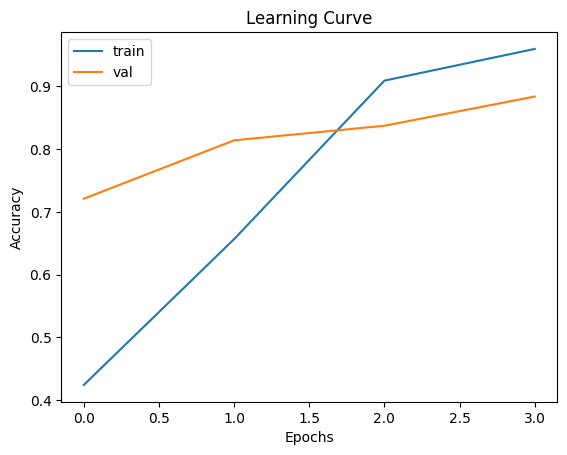

In [188]:
# learning curve plot of training accuracy vs validation accuracy

plt.title('Learning Curve')
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

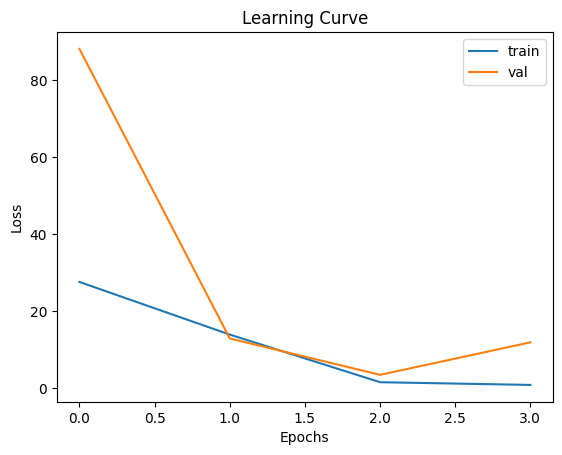

In [189]:
# learning curve plot of training accuracy vs validation accuracy

plt.title('Learning Curve')
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Testing data

In [ ]:
# iterating through the folder containing testing audio creating lists containing 
# the audio filename, the language code of the audio and the language of the audio 

test_path = r'C:\Users\dariu\Jupyter Notebook\Natural Language Processing\Audio NLP Files\test\test\\'
filename_list = []
language_code_list = []
language_list = []
for filename in os.listdir(test_path):
    lang = filename[:2]
    file = filename
    filename_list.append(file)
    language_code_list.append(lang)
    language_list.append(lang_code[lang])

In [ ]:
# creating a dataset containg test meta data

test_data = pd.DataFrame({'filename':filename_list, 'lang_code':language_code_list, 'language':language_list})

In [ ]:
# shuffling dataset

test_data = test_data.sample(frac=1).reset_index(drop=True)

In [ ]:
print(test_data.shape)
test_data.head()

(540, 3)


,filename,lang_code,language
0,de_m_923551d571cc437382d0294dda2dd0aa.fragment...,de,German
1,es_m_08111ce8d6a7ebc6cd2c27e62a3d98f0.fragment...,es,Spanish
2,es_f_50298ab71aaba8508ebeef49d853df11.fragment...,es,Spanish
3,de_m_923551d571cc437382d0294dda2dd0aa.fragment...,de,German
4,de_f_63f5b79c76cf5a1a4bbd1c40f54b166e.fragment...,de,German


In [ ]:
# iterating through all the files in testing folder and extracting lists that contain mfccs features, language of audio
# and name of the audio file

feature_list1 = []
language_list1 = []
filename_list1 = []
for index, row in tqdm(test_data.iterrows()):
    file = row['filename']
    feature = feature_extractor(file,test_path)
    lang = row['language']
    feature_list1.append(feature)
    language_list1.append(lang)
    filename_list1.append(file)

540it [00:08, 61.47it/s]


In [ ]:
# creating a dataset with filename, mfccs features and language

test_feature_data = pd.DataFrame({'filename':filename_list1, 'mfccs_feature':feature_list1, 'language':language_list1})
print(test_feature_data.shape)
test_feature_data.head()

(540, 3)


,filename,mfccs_feature,language
0,de_m_923551d571cc437382d0294dda2dd0aa.fragment...,"[[-143.80557, 112.18857, -22.420055, 33.581825...",German
1,es_m_08111ce8d6a7ebc6cd2c27e62a3d98f0.fragment...,"[[-385.5093, 169.23666, 18.599333, 35.59578, 3...",Spanish
2,es_f_50298ab71aaba8508ebeef49d853df11.fragment...,"[[-360.50027, 34.887474, 57.489117, 44.12831, ...",Spanish
3,de_m_923551d571cc437382d0294dda2dd0aa.fragment...,"[[-175.05586, 70.56954, -2.6202817, 36.999046,...",German
4,de_f_63f5b79c76cf5a1a4bbd1c40f54b166e.fragment...,"[[-563.02045, 2.915547, 2.7394772, 2.4591236, ...",German


In [ ]:
X_test = np.array(feature_list1)
print(X_test.shape)

(540, 431, 40)


In [ ]:
# reshaping X data to work with model

X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], X_test.shape[2], 1))
print(X_test.shape)

(540, 431, 40, 1)


In [ ]:
# label encoding the categorical varaibles

y_test = le.transform(test_feature_data['language'])
y_test = np.array(y_test.tolist())
print(y_test.shape)

(540,)


In [ ]:
# evaluating the model

loss, accuracy = model.evaluate(X_test, y_test, verbose=2)

17/17 - 0s - loss: 0.2454 - accuracy: 0.9241


<ipython-input-63-f8f9c65c4600>:13: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.title('Confusion Matrix - MLP Model', Fontsize=20)


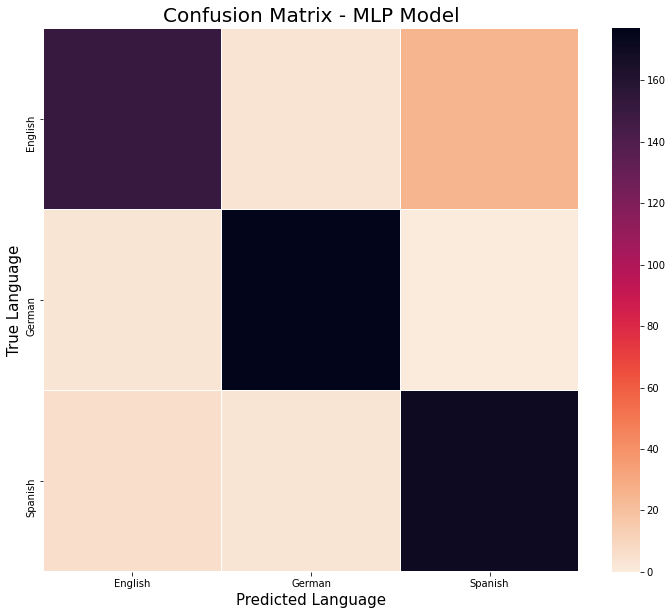

In [ ]:
lang_list = ['English', 'German', 'Spanish']
y_pred_prob = model.predict(X_test) # returns an array containing probability for each category being output
y_pred = []
for i in y_pred_prob:
    out = np.argmax(i) # taking the highest probability category as output
    y_pred.append(out)
y_pred = np.array(y_pred)

cm = confusion_matrix(y_test, y_pred) # confusion matrix

# heat map of confusion matrix
plt.figure(figsize=(12,10))
plt.title('Confusion Matrix - MLP Model', Fontsize=20)
sns.heatmap(cm, xticklabels=lang_list, yticklabels=lang_list, cmap='rocket_r', linecolor='white', linewidth=.005)
plt.xlabel('Predicted Language', fontsize=15)
plt.ylabel('True Language', fontsize=15)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89       180
           1       0.96      0.98      0.97       180
           2       0.87      0.95      0.91       180

    accuracy                           0.92       540
   macro avg       0.93      0.92      0.92       540
weighted avg       0.93      0.92      0.92       540



In [ ]:
# saving the model

model.save('audio_lang_model.h5')

In [ ]:
# loading the model

model = load_model('audio_lang_model.h5')

In [ ]:
file = 'en_m_b74b2bf2af570393cae91f4ed89cece7.fragment88.flac'
path = r'C:\Users\dariu\Jupyter Notebook\Natural Language Processing\Audio NLP Files\test\test\\'

inp = feature_extractor(file,path)
inp = inp.reshape(1, inp.shape[0], inp.shape[1], 1)

out = model.predict(inp)

output = np.argmax(out)
output = le.inverse_transform([output])
output

array(['English'], dtype=object)